Primeiras linhas do DataFrame:
             nome  Player_Age  Player_Weight  Player_Height  \
0      João Silva          25           1.78             75   
1  Lucas Oliveira          30           1.85             82   
2    Rafael Costa          22           1.72             68   
3  Matheus Santos          27           1.80             74   
4  Pedro Henrique          23           1.88             79   

   Previous_Injuries  Training_Intensity  Recovery_Time  Likelihood_of_Injury  
0                  0                   4              1                     0  
1                  1                   3             15                     1  
2                  0                   5              1                     0  
3                  1                   2             10                     1  
4                  0                   5              1                     0  

Nomes das colunas:
Index(['nome', 'Player_Age', 'Player_Weight', 'Player_Height',
       'Previous_Injuries',

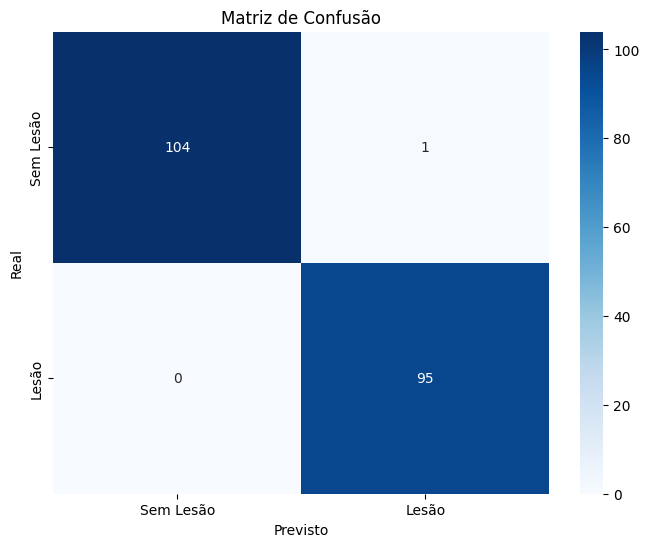


Jogadores com as maiores probabilidades de lesão:
    Lesão Prevista  Probabilidade de Lesão
54               1                0.999893
30               1                0.999633
39               1                0.999606
96               1                0.999266
44               1                0.999248
25               1                0.999232
10               1                0.999205
63               1                0.999187
59               1                0.998773
78               1                0.998637

Jogadores com as menores probabilidades de lesão:
     Lesão Prevista  Probabilidade de Lesão
974               0                0.001101
23                0                0.001149
721               0                0.001158
917               0                0.001250
893               0                0.001271
60                0                0.001325
837               0                0.001353
72                0                0.001370
901               0          

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar o arquivo CSV
file_path = 'injury_data.csv'  # Caminho para o arquivo CSV
df = pd.read_csv(file_path)

# Verificar as primeiras linhas e as colunas do DataFrame
print("Primeiras linhas do DataFrame:")
print(df.head())

# Verificar os nomes das colunas
print("\nNomes das colunas:")
print(df.columns)

# Renomear colunas de acordo com as novas especificações
df.rename(columns={
    'nome': 'Nome',
    'Player_Age': 'Idade',
    'Player_Weight': 'Peso (kg)',
    'Player_Height': 'Altura (cm)',
    'Previous_Injuries': 'Lesões Anteriores',
    'Training_Intensity': 'Intensidade do Treino',
    'Recovery_Time': 'Tempo de Recuperação',
    'Likelihood_of_Injury': 'Lesão'
}, inplace=True)

# Verificar se a renomeação foi bem-sucedida
print("\nNomes das colunas após renomeação:")
print(df.columns)

# Separar as variáveis de entrada (X) e a variável alvo (y)
X = df.drop(['Lesão', 'Nome'], axis=1)  # Remover a coluna 'Nome' e a coluna alvo 'Lesão'
y = df['Lesão']

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar os dados numéricos para escalas consistentes
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Treinar o modelo de Regressão Logística
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test_scaled)

# Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Exibir resultados
print(f'Acurácia: {accuracy}')
print(f'Matriz de Confusão:\n{conf_matrix}')
print(f'Relatório de Classificação:\n{class_report}')

# Visualizar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Sem Lesão', 'Lesão'], yticklabels=['Sem Lesão', 'Lesão'])
plt.title('Matriz de Confusão')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.show()

# Previsão de probabilidades
probabilidades = model.predict_proba(X_test_scaled)

# Adicionar as probabilidades ao DataFrame original
df_test = X_test.copy()
df_test['Lesão Prevista'] = y_test
df_test['Probabilidade de Lesão'] = probabilidades[:, 1]  # Probabilidade de lesão é a coluna de índice 1

# Exibir os jogadores com as maiores e menores probabilidades de lesão
maiores_probabilidades = df_test.nlargest(10, 'Probabilidade de Lesão')
menores_probabilidades = df_test.nsmallest(10, 'Probabilidade de Lesão')

print("\nJogadores com as maiores probabilidades de lesão:")
print(maiores_probabilidades[['Lesão Prevista', 'Probabilidade de Lesão']])

print("\nJogadores com as menores probabilidades de lesão:")
print(menores_probabilidades[['Lesão Prevista', 'Probabilidade de Lesão']])